In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


There are no null values in the data. 
Columns - Serial No. is not giving any relevent information we can remove it.

In [7]:
df.drop('Serial No.' , axis = 1, inplace = True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

There are only 2 values in the Resereach Column. That's why there is a gap between median and mean value.

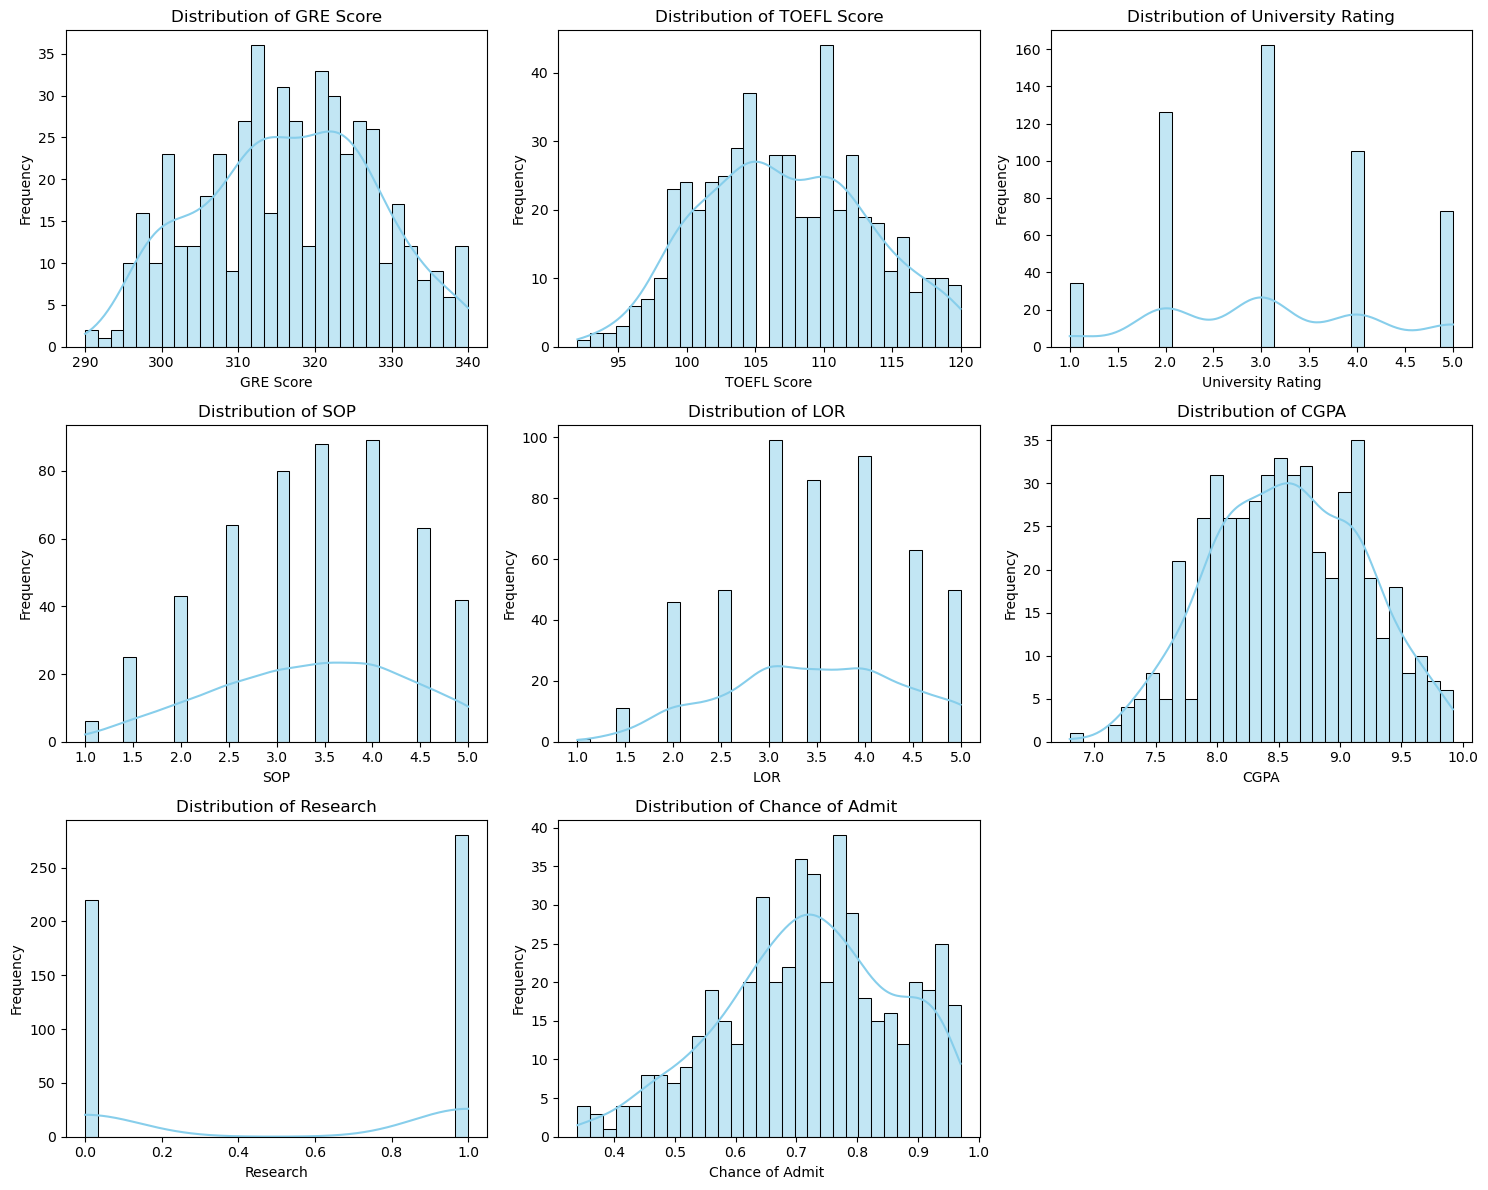

In [11]:
#Univariate Analysis
n_cols = 3  
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most of the data is following the normal distribution.

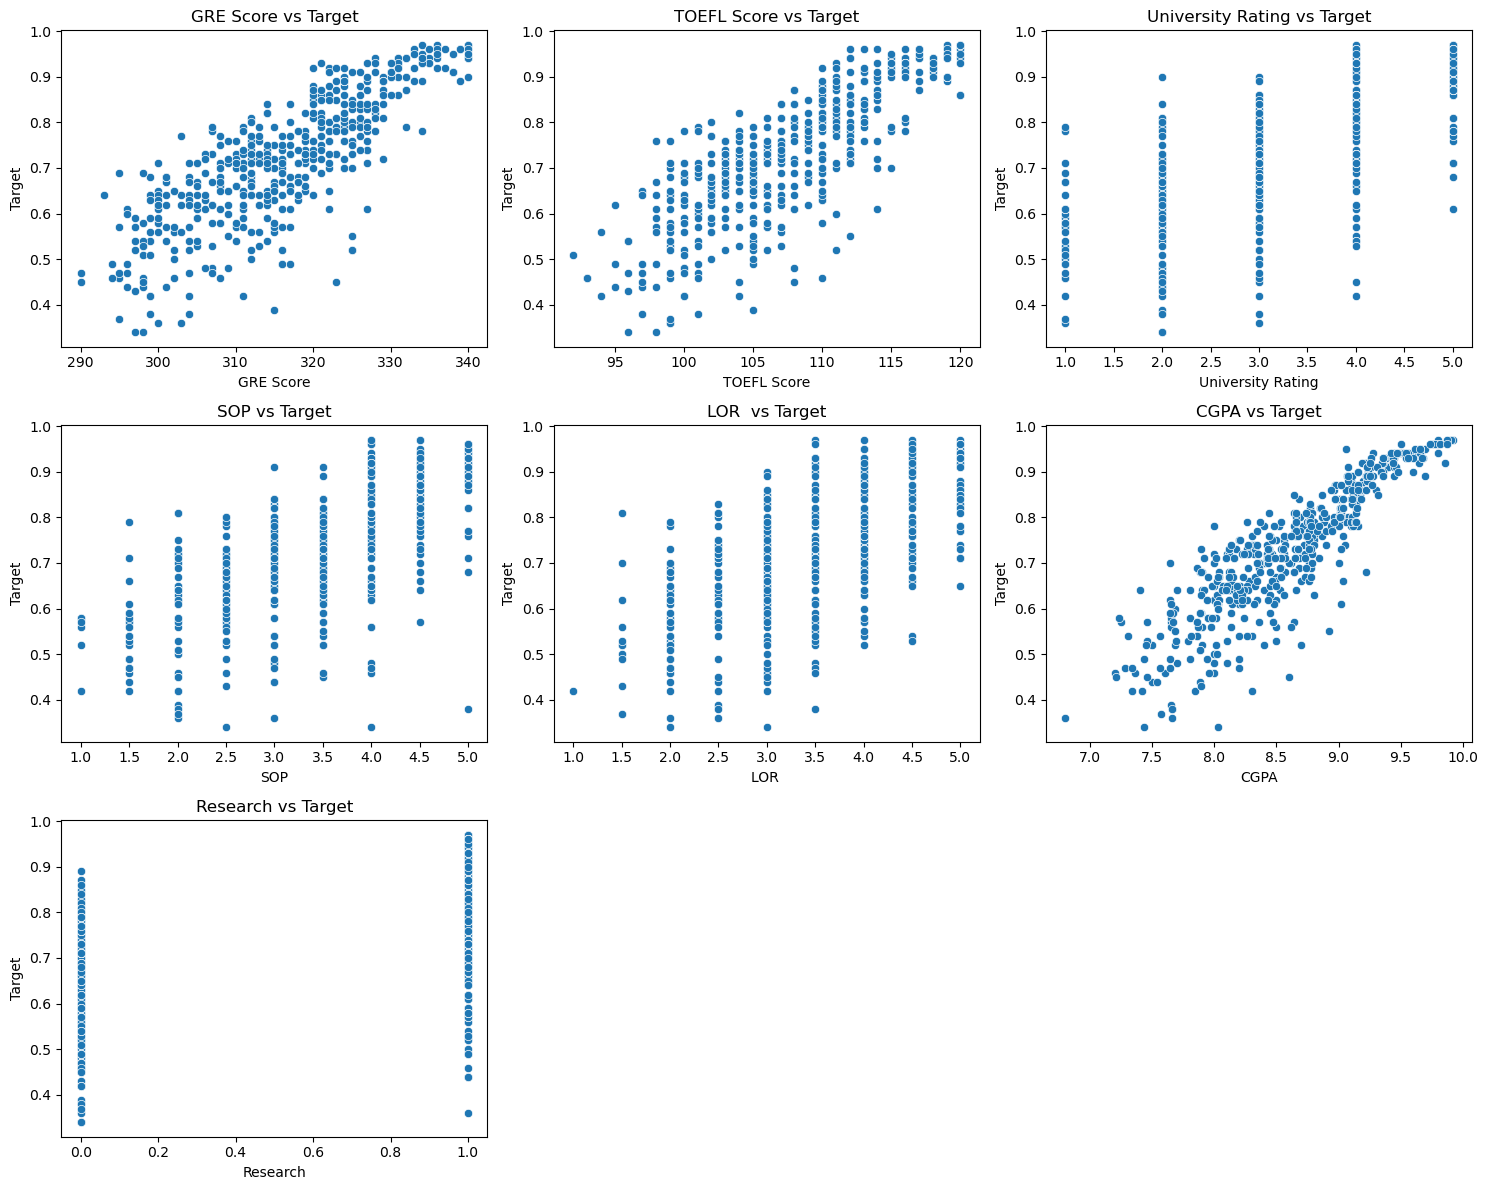

In [12]:
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

n_cols = 3  # number of plots per row
n_rows = (len(X.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # adjust size based on columns

for i, col in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


In [13]:
df[['University Rating', 'SOP', 'LOR ']].nunique()

University Rating    5
SOP                  9
LOR                  9
dtype: int64

<Axes: >

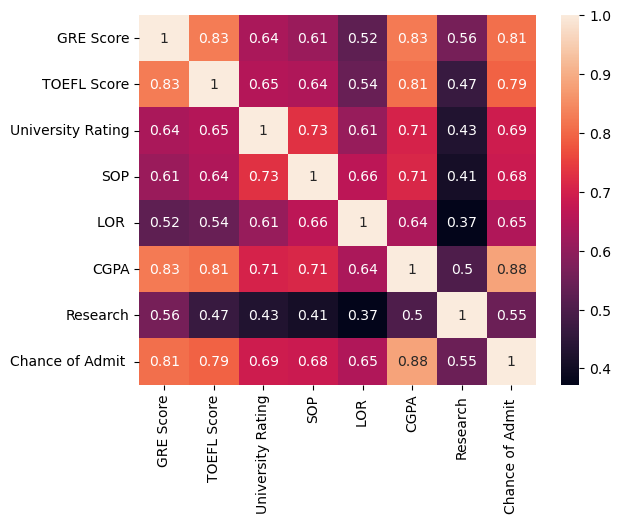

In [14]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)

# Assumption of Linearity
1. Though University Rating, SOP and LOR have limited unique values but showing a linear relationship with the Target(Chance of Admit).
2. Other than that other 3 variables GRE Score, Toeffl score and CGPA clearly showing a linear relationship with the Traget variable.
3. We can see in the heatmap there is a string correlation between the Target Variable and independent features.
4. But also there is multicolinearity.

# Standardize the Data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


# Splitting the Data

In [16]:
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
X.shape, y.shape

((500, 7), (500,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'Shape of X train: {X_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print(f'Shape of X test: {X_test.shape}')
print(f'Shape of y test: {y_test.shape}')

Shape of X train: (400, 7)
Shape of y train: (400,)
Shape of X test: (100, 7)
Shape of y test: (100,)


# Creating the model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [19]:
#Coeffecients : Values of w vector
print(f'Coeffecients : {model.coef_}')

#Intercept : Bias term
print(f'Intercept : {model.intercept_}')

Coeffecients : [0.19482262 0.12909489 0.02081226 0.01273465 0.11302848 0.48219942
 0.08458618]
Intercept : 0.007735680758563214


In [20]:
#Accuracy
print(f'Train Accuracy: {model.score(X_train, y_train)}')
print(f'Test Accuracy: {model.score(X_test, y_test)}')

Train Accuracy: 0.8210671369321554
Test Accuracy: 0.8188432567829629


It looks like a decent Accuracy.
But let's see if that can be increase

In [21]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          3.41e-142
Time:                        17:52:20   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

p-value of University Rating and SOP is exceeding 0.05. That means these feature does not hold any meaningful relationship with the Target variable.

In [22]:
X_sm = X_sm.drop(['University Rating', 'SOP'], axis = 1)
sm_model2 = sm.OLS(y_train, X_sm).fit()
print(sm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          1.36e-144
Time:                        17:52:20   Log-Likelihood:                -222.06
No. Observations:                 400   AIC:                             456.1
Df Residuals:                     394   BIC:                             480.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0075      0.021      0.354      

# Let's check for the Multicolinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_sm, columns = X_sm.columns)
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,GRE Score,4.47
4,CGPA,4.28
2,TOEFL Score,3.54
3,LOR,1.66
5,Research,1.50
0,const,1.00


Though the VIF is less than 5. We'll not remove any feature further.

In [25]:
y_hat = sm_model2.predict(X_sm)
errors = y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

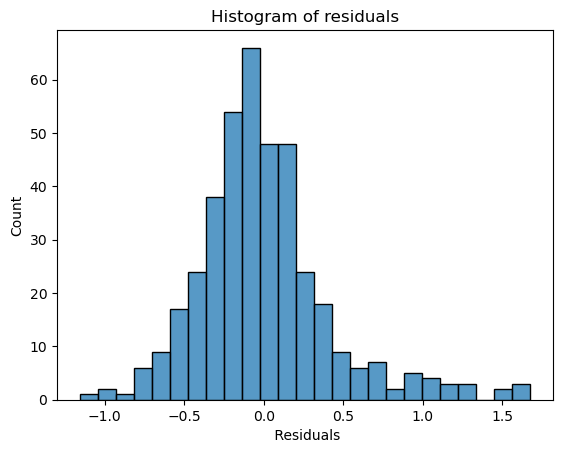

In [26]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

Residuals are noramlly distrubuted.

# Checking for heteroskedasticity

Text(0.5, 1.0, 'Predicted values vs Residuals')

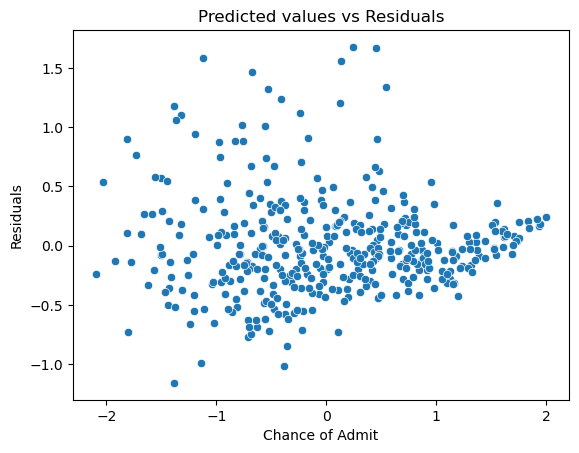

In [27]:
sns.scatterplot(x = y_hat, y = errors)
plt.xlabel("Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

erros are not increasing as we move from left to right hence there is no sign of heteroscadasticity

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

X_train = X_train.drop(['University Rating', 'SOP'], axis = 1)
X_test = X_test.drop(['University Rating', 'SOP'], axis = 1)
model = LinearRegression()

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

score = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'r2')

print("R2 score of each folds", np.round(score, 3))
print("Average of R2 score", np.mean(score))

R2 score of each folds [0.829 0.802 0.745 0.835 0.86 ]
Average of R2 score 0.8143751990248344


In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
test_accuracy = r2_score(y_test, y_pred)

print("R2 of test data", round(test_accuracy, 3))

R2 of test data 0.816


In [31]:
y_pred_train = model.predict(X_train)
train_accuracy = r2_score(y_train, y_pred_train)

print('Train Accuracy', np.round(train_accuracy, 3))

Train Accuracy 0.821


# We have got Train Accuracy : 82.1% and Test Accuracy : 81.6%